In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
bs = 32
path = Path('./train')

In [9]:
data = ImageDataBunch.from_folder(path, train="./train", valid_pct=0.2, size=224, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

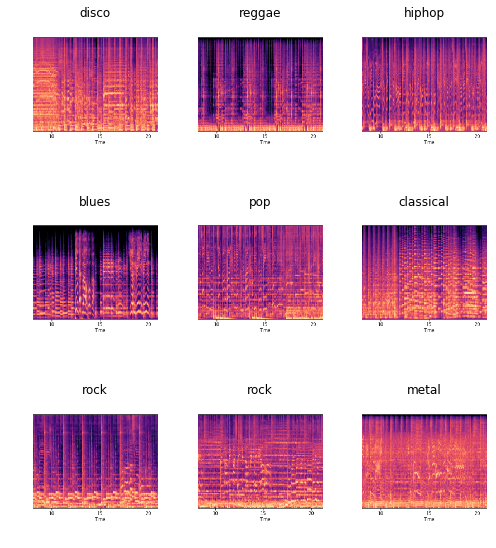

In [11]:
data.show_batch(rows=3, figsize=(7,8))

## With ResNet34

In [15]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [13]:
??create_cnn

In [16]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,2.474841,1.845271,0.660000
2,1.826643,1.149074,0.390000
3,1.402794,0.988519,0.330000
4,1.132504,0.983275,0.345000
5,0.941840,0.977714,0.340000


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


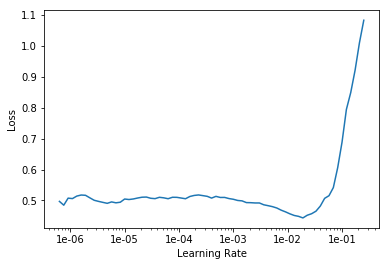

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate
1,0.825198,1.740191,0.455000
2,0.908011,4.273553,0.485000
3,0.805210,1.794710,0.295000
4,0.641874,0.617474,0.175000
5,0.484967,0.531498,0.155000


In [19]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

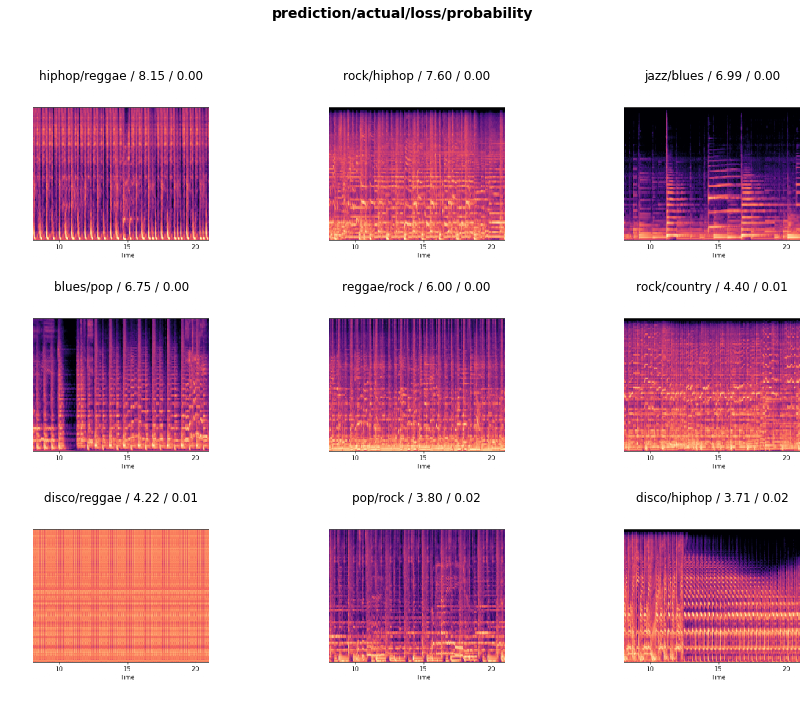

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

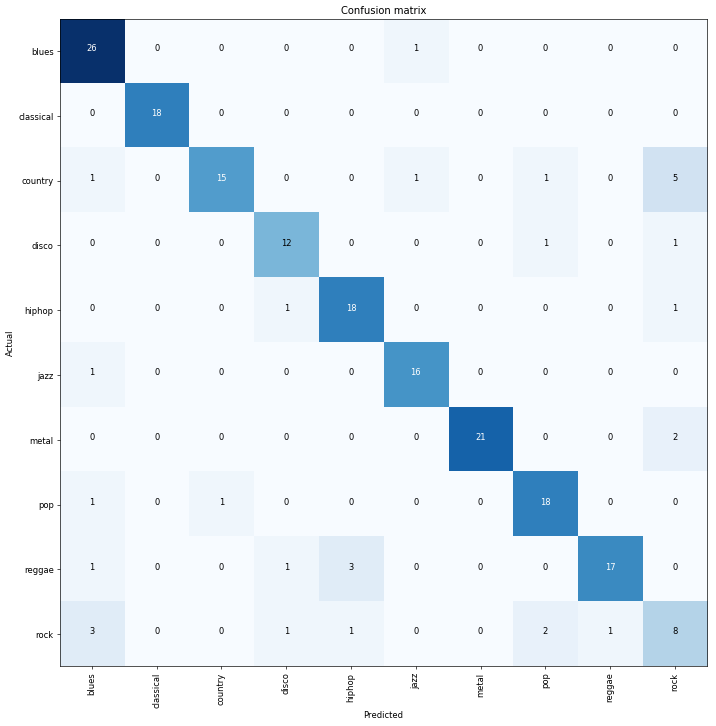

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## With ResNet50

In [41]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

AttributeError: module 'fastai.vision.models' has no attribute 'vgg16_bn'

In [25]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy
1,2.241825,1.724341,0.445000
2,1.495797,1.113480,0.665000
3,1.062793,0.964527,0.665000
4,0.793438,0.932569,0.670000
5,0.616747,0.926324,0.680000


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


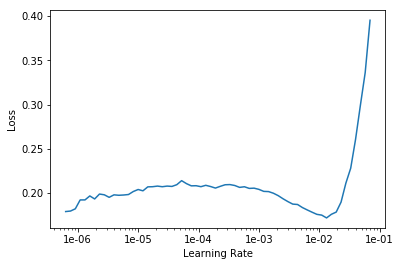

In [26]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,accuracy
1,0.578565,2.071830,0.565000
2,0.874262,6.230962,0.520000
3,0.794804,1.086289,0.725000
4,0.607537,0.684159,0.785000
5,0.449896,0.562691,0.850000


In [28]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

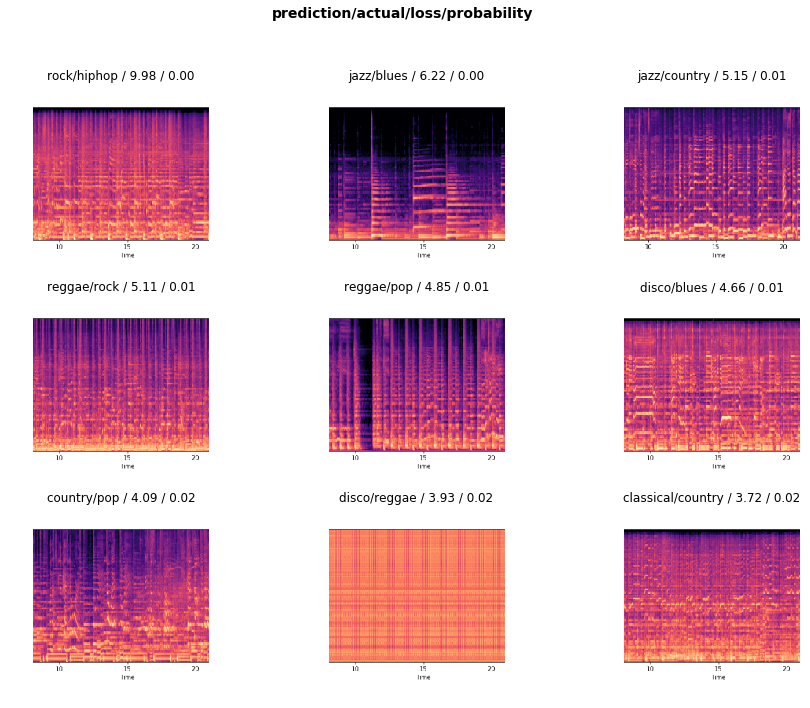

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

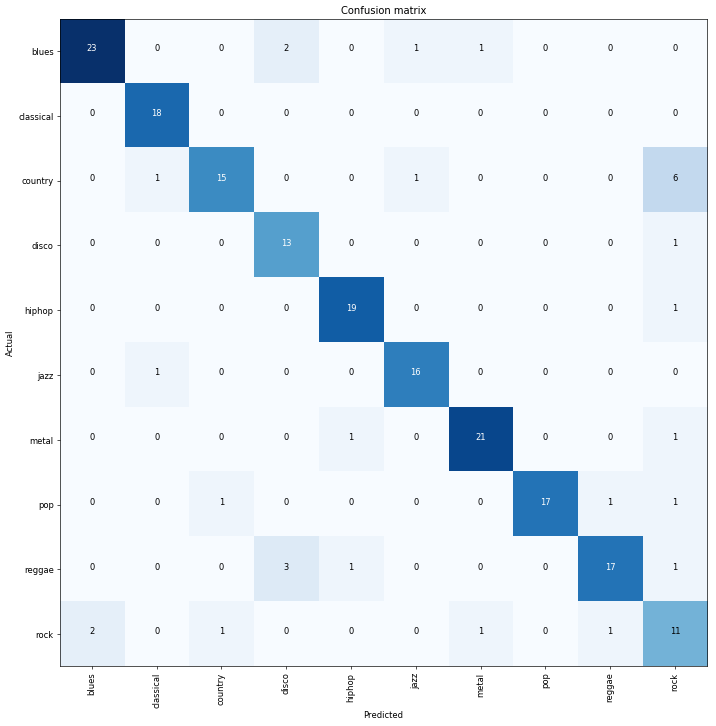

In [30]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## With SqueezeNet

In [47]:
learn = create_cnn(data, models.SqueezeNet, metrics=accuracy)

/opt/anaconda3/lib/python3.7/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/opt/anaconda3/lib/python3.7/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


In [35]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy
1,2.353472,2.626566,0.185000
2,1.935563,1.938719,0.350000
3,1.638933,1.579876,0.485000
4,1.428108,1.356461,0.585000
5,1.282887,1.264526,0.585000


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


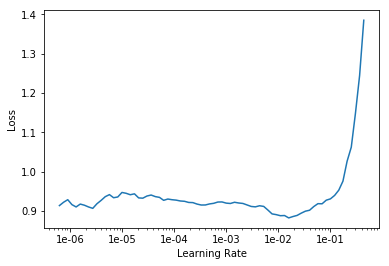

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,accuracy
1,1.012116,1.751547,0.425000
2,1.124045,2.896000,0.385000
3,1.145129,3.120028,0.300000
4,1.039579,1.561637,0.495000
5,0.925108,1.063634,0.640000


In [38]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

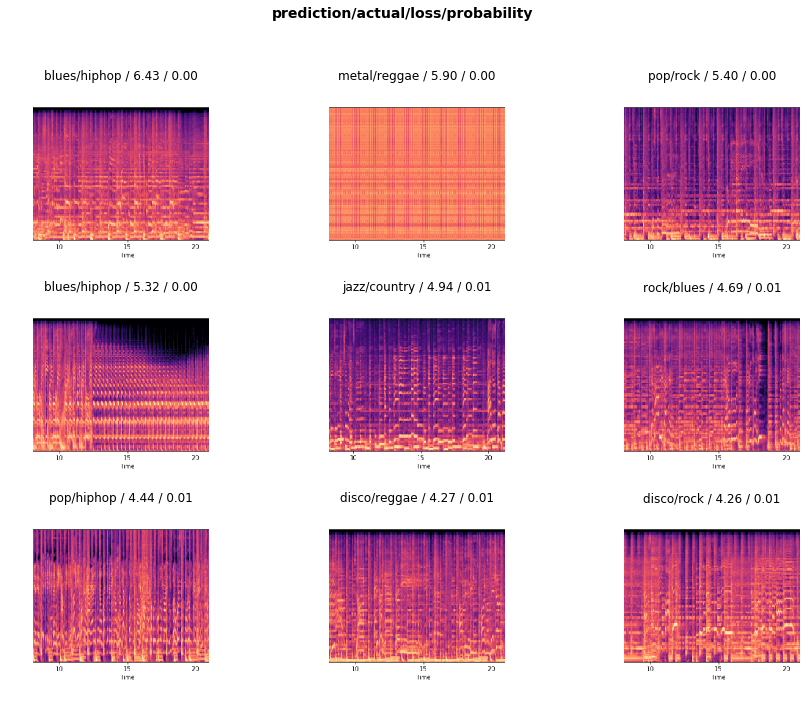

In [39]:
interp.plot_top_losses(9, figsize=(15,11))

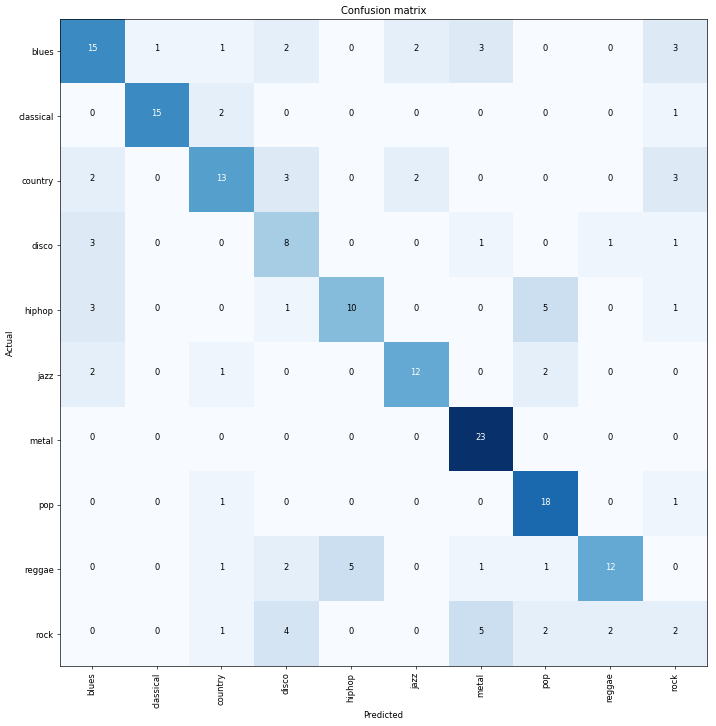

In [40]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)